<a href="https://colab.research.google.com/github/jee9894/DeepLearningStudy/blob/master/%ED%95%A9%EC%84%B1%EA%B3%B1_%EC%8B%A0%EA%B2%BD%EB%A7%9D_with_%EC%BC%80%EB%9D%BC%EC%8A%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# MNIST 패션 이미지 데이터 불러오기
(x_train_all, y_train_all), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

from sklearn.model_selection import train_test_split

# 훈련세트와 검증세트로 분류
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, 
                                                  test_size=0.2, random_state=42)

# 원-핫 인코딩
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_val_encoded = tf.keras.utils.to_categorical(y_val)

# 4차원으로 조정 (배치 차원, 이미지 행, 이미지 열, 컬러 채널)
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)

# 이미지 정규화 (0~255값을 255로 나눔)
x_train = x_train / 255
x_val = x_val / 255

# 케라스로 Sequential클래스 생성
conv1 = tf.keras.Sequential()
# 3X3 크기의 합성곱 커널 10개, 활성화함수 : ReLU, 패딩 : same padding, MNIST이미지의 높이,너비,컬러 채널
conv1.add(Conv2D(10, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))

In [0]:
# 풀링층 추가
# 스트라이드 기본값 : 풀링의 크기
# padding 기본값  : valid
conv1.add(MaxPooling2D((2, 2)))

In [0]:
# 완전 연결층에 주입할 특성 맵 펼치기
conv1.add(Flatten())

In [0]:
# 완전 연결층 쌓기
conv1.add(Dense(100, activation='relu'))
conv1.add(Dense(10, activation='softmax'))

In [0]:
# 모델 구조 살펴보기
conv1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 10)        100       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 1960)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               196100    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 197,210
Trainable params: 197,210
Non-trainable params: 0
_________________________________________________________________


In [0]:
# 최적화 함수 : adam(Adaptive Moment Estimation:적응적 학습)
# 손실함수 : 크로스 엔트로피 손실함수
conv1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
history = conv1.fit(x_train, y_train_encoded, epochs=20, validation_data=(x_val, y_val_encoded))

Epoch 1/20
1500/1500 [==============================] - 21s 14ms/step - loss: 0.4435 - accuracy: 0.8445 - val_loss: 0.3448 - val_accuracy: 0.8820
Epoch 2/20
1500/1500 [==============================] - 21s 14ms/step - loss: 0.3010 - accuracy: 0.8924 - val_loss: 0.3013 - val_accuracy: 0.8935
Epoch 3/20
1500/1500 [==============================] - 21s 14ms/step - loss: 0.2575 - accuracy: 0.9055 - val_loss: 0.2667 - val_accuracy: 0.9037
Epoch 4/20
1500/1500 [==============================] - 21s 14ms/step - loss: 0.2272 - accuracy: 0.9159 - val_loss: 0.2562 - val_accuracy: 0.9081
Epoch 5/20
1500/1500 [==============================] - 21s 14ms/step - loss: 0.2028 - accuracy: 0.9242 - val_loss: 0.2462 - val_accuracy: 0.9121
Epoch 6/20
1500/1500 [==============================] - 21s 14ms/step - loss: 0.1816 - accuracy: 0.9320 - val_loss: 0.2421 - val_accuracy: 0.9147
Epoch 7/20
1500/1500 [==============================] - 21s 14ms/step - loss: 0.1633 - accuracy: 0.9388 - val_loss: 0.2401 -

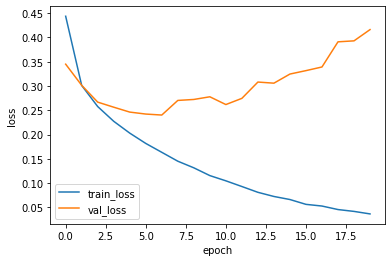

In [0]:
# 에포크당 손실
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

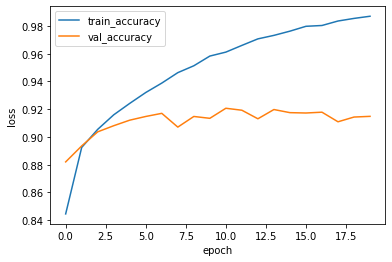

In [0]:
# 에포크당 정확도
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()